In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

/Users/yjlee/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def sin(x, T=100):
    return np.sin(2.0*np.pi*x/T)

In [3]:
def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2*T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

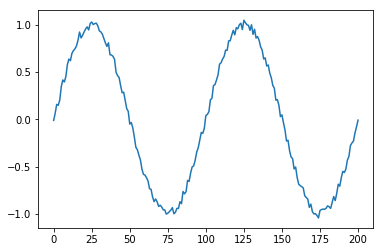

In [4]:
T=100
f = toy_problem(T)
x=np.arange(0, 2*T + 1)
plt.plot(x, f)

In [5]:
length_of_sequences = 2*T   # total seq 200개
maxlen = 25
data = []
target = []

for i in range(0, length_of_sequences - maxlen +1):
    data.append(f[i:i+maxlen])   # input sequence
    target.append(f[i+maxlen])   # target data
    
X = np.array(data).reshape(len(data), maxlen, 1)

In [6]:
Y = np.array(target).reshape(len(data), 1)   # length_of_sequences-maxlen+1, 1

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
N_train = int(len(data)*0.9)   # trainset: 90%
N_validation = len(data)-N_train   # test set: 전체 set-train set
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=N_validation)

In [8]:
### This is an independent example for zero_state command!
n_hidden=30  # number of units in the RNN cell
n_batch=5
init = tf.global_variables_initializer()
sess = tf.Session()
cell = tf.contrib.rnn.BasicRNNCell(n_hidden)
initial_state = cell.zero_state(n_batch, tf.float32) #need special case here
# zero_state: arg-batch_size, dtype
sess.run(init)
sess.run(initial_state)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [15]:
tf.keras.backend.clear_session()

In [16]:
def inference(x, n_batch, maxlen = None, n_hidden = None, n_out = None): # input은 25차원 a는 30차원 y는 1차원 데이터수는 176개입니다.
    def weight_variable(shape):
        return tf.Variable(tf.truncated_normal(shape, stddev=0.01)) # 초기화해주기
    def bias_variable(shape):
        return tf.Variable(tf.zeros(shape))
    
    #cell = tf.contrib.rnn.BasicRNNCell(n_hidden)   # RNN에서 basic cell
    #initial_state = cell.zero_state(n_batch, tf.float32) # initial state 176x30 
    #state = initial_state 
    init_state = tf.zeros(shape = (n_batch, n_hidden))   # zero_state의 역할
    state = init_state
    ct = init_state
    
    outputs = []
    outputs_c = []
    n_in = 1; n_out = 1
    Wxh_f = tf.get_variable('Wxh_f', shape = (n_in, n_hidden),
                         initializer = tf.contrib.layers.xavier_initializer(), dtype = tf.float32)
    Whh_f = tf.get_variable('Whh_f', shape = (n_hidden, n_hidden),
                         initializer = tf.contrib.layers.xavier_initializer(), dtype = tf.float32)
    bh_f = tf.get_variable('bh_f', shape = (1, n_hidden),
                         initializer = tf.contrib.layers.xavier_initializer(), dtype = tf.float32)
    Wxh_i = tf.get_variable('Wxh_i', shape = (n_in, n_hidden),
                         initializer = tf.contrib.layers.xavier_initializer(), dtype = tf.float32)
    Whh_i = tf.get_variable('Whh_i', shape = (n_hidden, n_hidden),
                         initializer = tf.contrib.layers.xavier_initializer(), dtype = tf.float32)
    bh_i = tf.get_variable('bh_i', shape = (1, n_hidden),
                         initializer = tf.contrib.layers.xavier_initializer(), dtype = tf.float32)
    Wxh_o = tf.get_variable('Wxh_o', shape = (n_in, n_hidden),
                         initializer = tf.contrib.layers.xavier_initializer(), dtype = tf.float32)
    Whh_o = tf.get_variable('Whh_o', shape = (n_hidden, n_hidden),
                         initializer = tf.contrib.layers.xavier_initializer(), dtype = tf.float32)
    bh_o = tf.get_variable('bh_o', shape = (1, n_hidden),
                         initializer = tf.contrib.layers.xavier_initializer(), dtype = tf.float32)
    Wxh_g = tf.get_variable('Wxh_g', shape = (n_in, n_hidden),
                         initializer = tf.contrib.layers.xavier_initializer(), dtype = tf.float32)
    Whh_g = tf.get_variable('Whh_g', shape = (n_hidden, n_hidden),
                         initializer = tf.contrib.layers.xavier_initializer(), dtype = tf.float32)
    bh_g = tf.get_variable('bh_g', shape = (1, n_hidden),
                         initializer = tf.contrib.layers.xavier_initializer(), dtype = tf.float32)
    
        
    for t in range(maxlen):
        forget = tf.sigmoid(tf.matmul(x[:,t,:], Wxh_f)+tf.matmul(state, Whh_f)+bh_f)
        inputgate = tf.sigmoid(tf.matmul(x[:,t,:], Wxh_i)+tf.matmul(state, Whh_i)+bh_i)
        outputgate = tf.sigmoid(tf.matmul(x[:,t,:], Wxh_o)+tf.matmul(state, Whh_o)+bh_o)
        forget = tf.sigmoid(tf.matmul(x[:,t,:], Wxh_f)+tf.matmul(state, Whh_f)+bh_f)
        gt = tf.tanh(tf.matmul(x[:,t,:], Wxh_g) + tf.matmul(state, Whh_g)+bh_g)
        ct = forget*ct + inputgate*gt
        state = outputgate*tf.tanh(ct)
        # tanh(Wxh*x+Whh*h+bh)
        # x(176, 1)*Wxh(1,30) + h(176, 30)*(30,30) + b => h(176,30)
        outputs.append(state)
        outputs_c.append(ct)
    output = outputs[-1] # output은 모든 h 값 중에서 제일 마지막 값
    output_c = outputs_c[-1]
    
    
    V = weight_variable([n_hidden, n_out])  # 30x1 
    c = bias_variable([n_out])
    y = tf.matmul(output, V) + c   # a= y(176x30) W(30x1) + b 를 최종 y로 쓴다
    return y

In [17]:
n_in = 1
n_out = 1
x = tf.placeholder(tf.float32, shape=[None, maxlen, n_in])
t = tf.placeholder(tf.float32, shape=[None, n_out])
n_batch = tf.placeholder(tf.int32, shape=[])

In [18]:
y = inference(x,n_batch=n_batch, maxlen=maxlen, n_hidden=n_hidden, n_out=n_out)

In [19]:
def loss(y, t):
    mse = tf.reduce_mean(tf.square(y-t))
    return mse


def training(loss):
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.999)
    train_step = optimizer.minimize(loss)
    return train_step

loss = loss(y,t)
train_step = training(loss)

In [20]:
epochs = 500
batch_size = 10

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

n_batches = N_train // batch_size
from sklearn.utils import shuffle

In [21]:
my_loss = []
for epoch in range(epochs):
    X_, Y_ = shuffle(X_train, Y_train)
    
    for i in range(n_batches):
        start = i* batch_size
        end = start + batch_size
    
    sess.run(train_step, feed_dict={
        x: X_[start:end], 
        t: Y_[start:end],
        n_batch: batch_size
    })
    
    val_loss = loss.eval(session=sess, feed_dict={
        x: X_validation, 
        t: Y_validation, 
        n_batch: N_validation
    })
    my_loss.append(val_loss)
    print("epoch:", epoch, "validation loss:", val_loss)

epoch: 0 validation loss: 0.41169932
epoch: 1 validation loss: 0.40687937
epoch: 2 validation loss: 0.40255135
epoch: 3 validation loss: 0.39806506
epoch: 4 validation loss: 0.39350033
epoch: 5 validation loss: 0.38874522
epoch: 6 validation loss: 0.3838445
epoch: 7 validation loss: 0.37873343
epoch: 8 validation loss: 0.37332782
epoch: 9 validation loss: 0.3677463
epoch: 10 validation loss: 0.3620091
epoch: 11 validation loss: 0.35611808
epoch: 12 validation loss: 0.35024893
epoch: 13 validation loss: 0.34424192
epoch: 14 validation loss: 0.33809075
epoch: 15 validation loss: 0.33173898
epoch: 16 validation loss: 0.3251749
epoch: 17 validation loss: 0.31842932
epoch: 18 validation loss: 0.31135952
epoch: 19 validation loss: 0.30393827
epoch: 20 validation loss: 0.2964061
epoch: 21 validation loss: 0.28873864
epoch: 22 validation loss: 0.28123537
epoch: 23 validation loss: 0.2736352
epoch: 24 validation loss: 0.26583517
epoch: 25 validation loss: 0.25789917
epoch: 26 validation loss: 0

epoch: 211 validation loss: 0.0020450694
epoch: 212 validation loss: 0.0019934673
epoch: 213 validation loss: 0.0019802507
epoch: 214 validation loss: 0.0018598682
epoch: 215 validation loss: 0.0017369406
epoch: 216 validation loss: 0.0016490346
epoch: 217 validation loss: 0.001602772
epoch: 218 validation loss: 0.0015788564
epoch: 219 validation loss: 0.0015705333
epoch: 220 validation loss: 0.0015686149
epoch: 221 validation loss: 0.0016001349
epoch: 222 validation loss: 0.0016787718
epoch: 223 validation loss: 0.0018577485
epoch: 224 validation loss: 0.0020107676
epoch: 225 validation loss: 0.0020431175
epoch: 226 validation loss: 0.0020656516
epoch: 227 validation loss: 0.0019820465
epoch: 228 validation loss: 0.0020150794
epoch: 229 validation loss: 0.0019643167
epoch: 230 validation loss: 0.0018775935
epoch: 231 validation loss: 0.0018381538
epoch: 232 validation loss: 0.0017094625
epoch: 233 validation loss: 0.0016324079
epoch: 234 validation loss: 0.0015996724
epoch: 235 valida

epoch: 424 validation loss: 0.0012910662
epoch: 425 validation loss: 0.0012626306
epoch: 426 validation loss: 0.0012856448
epoch: 427 validation loss: 0.0013460363
epoch: 428 validation loss: 0.0014338258
epoch: 429 validation loss: 0.001565193
epoch: 430 validation loss: 0.0017309827
epoch: 431 validation loss: 0.0019653388
epoch: 432 validation loss: 0.0020816254
epoch: 433 validation loss: 0.0020339661
epoch: 434 validation loss: 0.0019935826
epoch: 435 validation loss: 0.001928839
epoch: 436 validation loss: 0.0017918901
epoch: 437 validation loss: 0.0016554043
epoch: 438 validation loss: 0.001554366
epoch: 439 validation loss: 0.0014613665
epoch: 440 validation loss: 0.0013684134
epoch: 441 validation loss: 0.0013300275
epoch: 442 validation loss: 0.0012873119
epoch: 443 validation loss: 0.0012698638
epoch: 444 validation loss: 0.0012922758
epoch: 445 validation loss: 0.0013163267
epoch: 446 validation loss: 0.0013313842
epoch: 447 validation loss: 0.0013286128
epoch: 448 validati

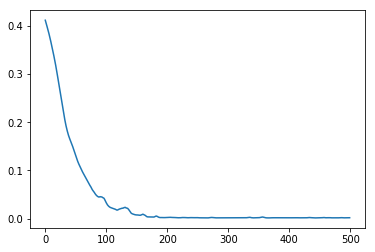

In [22]:
plt.plot(my_loss)

In [23]:
truncate = maxlen
truncate

25

In [26]:
Z=X[:1]

In [27]:
original = [f[i] for i in range(maxlen)]
predicted = [None for i in range(maxlen)]

In [28]:
for i in range(length_of_sequences - maxlen +1):
    z_ = Z[-1:]
    y_ = y.eval(session=sess, feed_dict={
        x: Z[-1:], 
        n_batch: 1
    })
    
    sequence_ = np.concatenate(
        (z_.reshape(maxlen, n_in)[1:], y_), axis=0).reshape(1, maxlen, n_in)
    Z = np.append(Z, sequence_, axis=0)
    predicted.append(y_.reshape(-1))

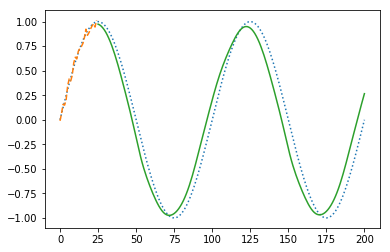

In [29]:
plt.plot(toy_problem(T, ampl=0), linestyle="dotted")
plt.plot(original, linestyle="dashed")
plt.plot(predicted)